<a href="https://colab.research.google.com/github/Tsukkei/CCDATSCL_COM221_PROJECT/blob/main/TFT_Code_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analyzing the Relationship Between Player Level, Remaining Gold, and Final Placement in Teamfight Tactics**

**Project Context:**

This project investigates the relationship between player level, remaining gold, and final placement using match-level data. By treating remaining gold as a proxy for spending efficiency and player level as an outcome of gold investment, the study aims to quantify whether successful players are characterized by more effective resource utilization. The findings contribute to a data-driven understanding of economic decision-making in competitive gameplay and offer insights into how strategic spending patterns influence performance outcomes in Teamfight Tactics.

**Research Question**:
- Is there a relationship between player level, remaining gold, and final placement in Teamfight Tactics?
- Is there a relationship between player level and remaining gold at the end of the match?
- Do players who achieve better placements tend to have lower remaining gold at the end of the match?

**General Objective**
- To examine how player level and remaining gold jointly relate to final placement in Teamfight Tactics matches.

**Specific Objectives**
- To analyze the relationship between player level and final placement.
- To analyze the relationship between remaining gold and final placement.
- To determine whether higher player levels are associated with lower remaining gold.
- To evaluate whether players who achieve better placements tend to convert gold into levels more efficiently.
- To assess the combined predictive effect of player level and remaining gold on final placement outcomes.


**Hypothesis 1: Player Level and Placement**
- H₀₁: Player level has no significant relationship with final placement.
- H₁₁: Higher player levels are associated with better final placements.

**Hypothesis 2: Remaining Gold and Placement**
- H₀₂: Remaining gold has no significant relationship with final placement.
- H₁₂: Lower remaining gold is associated with better final placements.

**Hypothesis 3: Player Level and Remaining Gold**
- H₀₃: Player level has no significant relationship with remaining gold.
- H₁₃: Higher player levels are associated with lower remaining gold.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

In [4]:
# Load the dataset
df = pd.read_csv("tft_dataset.csv")

# Show basic info
print(df.shape)
df.head()

(200, 25)


,match_id,endOfGameResult,gameCreation,gameId,game_datetime,game_length,game_version,game_variation,mapId,queue_id,...,level,gold_left,last_round,players_eliminated,time_eliminated,total_damage_to_players,win,companion,traits,units
0,SG2_133419296,NaN,1770412426144,SG2_133419296,1770412426144,2132.753906,Linux Version 16.3.744.1639 (Feb 04 2026/16:23...,NaN,NaN,6110,...,7,0,24,0,1403.975220,22,False,{'content_ID': 'b59fee17-bb63-49a3-bb8b-4bb34d...,TFT4_Adept(3); TFT4_Divine(3); TFT4_Duelist(1)...,TFT4_Wukong[]; TFT4_Jax[]; TFT4_Irelia[]; TFT4...
1,SG2_132759588,NaN,1770157137087,SG2_132759588,1770157137087,2285.700439,Linux Version 16.2.741.3171 (Jan 26 2026/11:02...,NaN,NaN,6110,...,7,9,26,0,1612.862427,28,False,{'content_ID': 'b59fee17-bb63-49a3-bb8b-4bb34d...,TFT4_Adept(2); TFT4_Divine(4); TFT4_Dragonsoul...,TFT4_Fiora[]; TFT4_Jax[]; TFT4_Irelia[]; TFT4_...
2,SG2_132307943,NaN,1769970903573,SG2_132307943,1769970903573,2208.969482,Linux Version 16.2.741.3171 (Jan 26 2026/11:02...,NaN,NaN,6110,...,7,11,26,0,1539.925171,27,False,{'content_ID': 'b59fee17-bb63-49a3-bb8b-4bb34d...,TFT4_Adept(1); TFT4_Divine(5); TFT4_Duelist(2)...,TFT4_Wukong[]; TFT4_Jax[]; TFT4_Irelia[]; TFT4...
3,SG2_132301963,NaN,1769968588579,SG2_132301963,1769968588579,2114.354492,Linux Version 16.2.741.3171 (Jan 26 2026/11:02...,NaN,NaN,6110,...,9,1,37,0,2102.688477,127,True,{'content_ID': 'b59fee17-bb63-49a3-bb8b-4bb34d...,TFT4_Brawler(1); TFT4_Cultist(3); TFT4_Dragons...,TFT4_Brand[]; TFT4_TwistedFate[]; TFT4_Braum[]...
4,SG2_132062412,NaN,1769883158076,SG2_132062412,1769883158076,2048.562988,Linux Version 16.2.741.3171 (Jan 26 2026/11:02...,NaN,NaN,6110,...,7,21,26,0,1467.537598,35,False,{'content_ID': 'b59fee17-bb63-49a3-bb8b-4bb34d...,TFT4_Adept(1); TFT4_Assassin(3); TFT4_Blacksmi...,TFT4b_Diana[]; TFT4_Akali[]; TFT4_Irelia[]; TF...


In [5]:
data = df[['placement', 'level', 'gold_left']].copy()

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

data.head()

placement    0
level        0
gold_left    0
dtype: int64


,placement,level,gold_left
0,6,7,0
1,7,7,9
2,7,7,11
3,2,9,1
4,7,7,21


In [6]:
print(data.describe())

        placement       level   gold_left
count  200.000000  200.000000  200.000000
mean     4.785000    7.585000   10.585000
std      2.173105    0.914855   14.993559
min      1.000000    4.000000    0.000000
25%      3.000000    7.000000    1.000000
50%      5.000000    8.000000    3.000000
75%      7.000000    8.000000   15.000000
max      8.000000   10.000000   61.000000


           placement     level  gold_left
placement   1.000000 -0.454582   0.192654
level      -0.454582  1.000000  -0.010787
gold_left   0.192654 -0.010787   1.000000


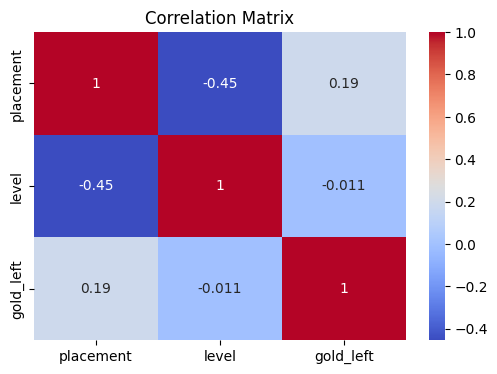

In [7]:
correlation = data.corr()
print(correlation)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

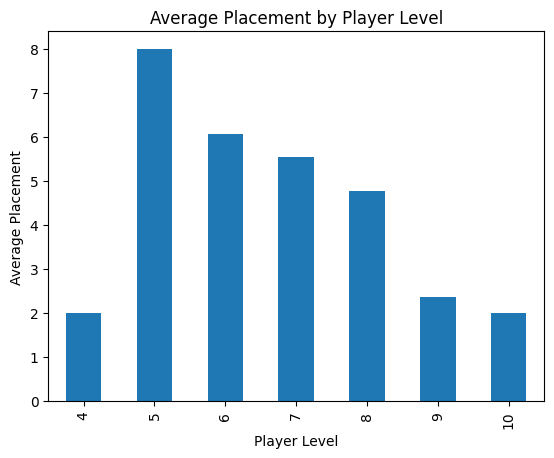

In [8]:
avg_placement_by_level = data.groupby('level')['placement'].mean()

plt.figure()
avg_placement_by_level.plot(kind='bar')
plt.xlabel("Player Level")
plt.ylabel("Average Placement")
plt.title("Average Placement by Player Level")
plt.show()

/tmp/ipython-input-2224183409.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_placement_by_gold = data.groupby('gold_range')['placement'].mean()


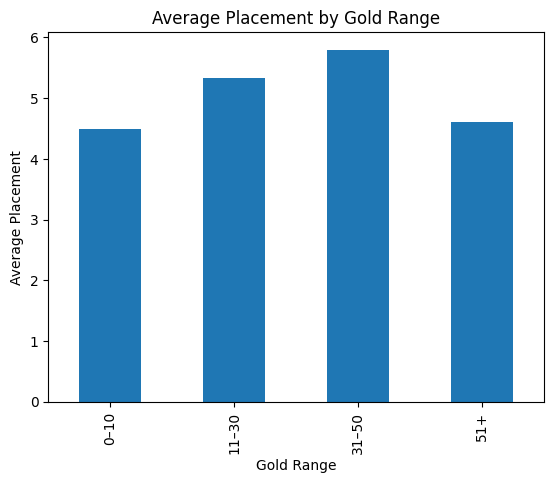

In [9]:
# Create gold ranges
data['gold_range'] = pd.cut(
    data['gold_left'],
    bins=[-1, 10, 30, 50, 100],
    labels=["0–10", "11–30", "31–50", "51+"]
)

avg_placement_by_gold = data.groupby('gold_range')['placement'].mean()

plt.figure()
avg_placement_by_gold.plot(kind='bar')
plt.xlabel("Gold Range")
plt.ylabel("Average Placement")
plt.title("Average Placement by Gold Range")
plt.show()

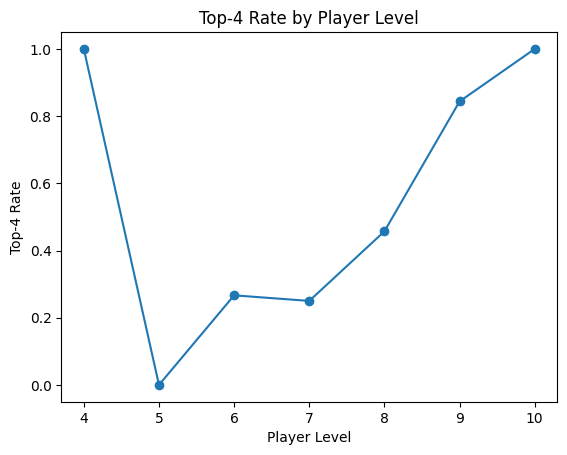

In [10]:
data['top4'] = (data['placement'] <= 4).astype(int)

top4_by_level = data.groupby('level')['top4'].mean()

plt.figure()
top4_by_level.plot(kind='line', marker='o')
plt.xlabel("Player Level")
plt.ylabel("Top-4 Rate")
plt.title("Top-4 Rate by Player Level")
plt.show()

In [11]:
from scipy.stats import pearsonr

print("=== Pearson Correlation with Significance Test ===\n")

# Level vs Placement
corr_lp, p_lp = pearsonr(data['level'], data['placement'])
print("Level vs Placement")
print("Correlation:", corr_lp)
print("p-value:", p_lp, "\n")

# Gold vs Placement
corr_gp, p_gp = pearsonr(data['gold_left'], data['placement'])
print("Gold Left vs Placement")
print("Correlation:", corr_gp)
print("p-value:", p_gp, "\n")

# Level vs Gold
corr_lg, p_lg = pearsonr(data['level'], data['gold_left'])
print("Level vs Gold Left")
print("Correlation:", corr_lg)
print("p-value:", p_lg)

=== Pearson Correlation with Significance Test ===

Level vs Placement
Correlation: -0.4545819719555549
p-value: 1.3638741187841409e-11 

Gold Left vs Placement
Correlation: 0.19265387082087343
p-value: 0.006273923539652688 

Level vs Gold Left
Correlation: -0.010787019217783444
p-value: 0.8795026711460984


In [12]:
X = data[['level', 'gold_left']]
y = data['placement']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.2943751765970719
RMSE: 1.847555163780412


In [13]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(importance)

     Feature  Coefficient
0      level    -1.087805
1  gold_left     0.018850


In [14]:
# Create Top4 variable
data['top4'] = (data['placement'] <= 4).astype(int)

X = data[['level', 'gold_left']]
y = data['top4']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        22
           1       0.72      0.72      0.72        18

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.75      0.75      0.75        40



In [15]:
importance_clf = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': clf.coef_[0]
})

print(importance_clf)

     Feature  Coefficient
0      level     0.873925
1  gold_left    -0.036360
